In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot
from keras.models import model_from_json
import os

In [5]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x.shape

(60000, 28, 28)

In [6]:
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]
train_x.shape

TensorShape([60000, 28, 28, 1])

In [9]:
train_x[0].shape

TensorShape([28, 28, 1])

In [8]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(pool_size=(2, 2)), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(pool_size=(2, 2)), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [10]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [11]:
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8829 - loss: 0.4010 - val_accuracy: 0.9774 - val_loss: 0.0829
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9715 - loss: 0.0929 - val_accuracy: 0.9838 - val_loss: 0.0543
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9823 - loss: 0.0560 - val_accuracy: 0.9858 - val_loss: 0.0454
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9866 - loss: 0.0448 - val_accuracy: 0.9900 - val_loss: 0.0337
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9895 - loss: 0.0340 - val_accuracy: 0.9918 - val_loss: 0.0256


In [12]:
lenet_5_model.evaluate(test_x, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9811 - loss: 0.0596


[0.05326385051012039, 0.9842000007629395]

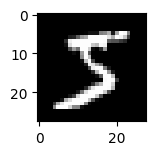

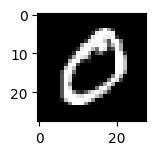

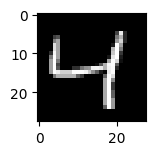

In [13]:
for i in range(3):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [17]:
lenet_5_model.save('lenet_5_model.keras')
print(os.listdir('.'))

['part-2', 'printMNIST.cu', 'part-1', 'train-images.idx3-ubyte', '.git', 'README.md', '.gitignore', 'LeNet5.ipynb', 'requirements.txt', '.venv', 'lenet_5_model.keras', 'image.png']


In [18]:
lenet_5_model.save("my.h5")

In [19]:
lenet_5_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,120 (723.13 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 123,414 (482.09 KB)

In [20]:
json_model = lenet_5_model.to_json()

In [21]:
with open('fashionmnist_model.json', 'w') as json_file:
    json_file.write(json_model)

In [23]:
lenet_5_model.save_weights('FashionMNIST.weights.h5')

In [24]:
lenet_5_model.layers[0].get_weights()[0]

array([[[[ 2.32470423e-01,  3.50300372e-01,  4.18946787e-04,
          -1.92589849e-01, -1.57323644e-01, -2.12721244e-01]],

        [[ 7.12955445e-02,  5.42501152e-01, -1.32186294e-01,
           2.99480557e-02, -6.38455227e-02, -2.68236905e-01]],

        [[ 4.04649317e-01,  3.43368918e-01, -1.01695664e-01,
          -3.21142793e-01, -3.46815795e-01, -1.52819395e-01]],

        [[ 4.38645065e-01, -2.77521857e-03, -2.02398568e-01,
          -4.03512716e-01, -1.86997786e-01, -9.66671556e-02]],

        [[ 2.36754492e-01,  1.02233931e-01, -2.24547639e-01,
          -3.52578849e-01, -3.22416008e-01,  1.26095697e-01]]],


       [[[ 1.02612868e-01,  3.43248606e-01, -1.91350266e-01,
          -3.35276037e-01, -1.81584090e-01,  1.43991292e-01]],

        [[ 9.03043896e-02,  3.05029571e-01, -2.38333434e-01,
          -2.14076042e-01, -3.41344088e-01,  3.64380926e-01]],

        [[ 1.38309464e-01,  5.18377125e-01,  2.49207392e-02,
          -6.53713718e-02, -5.19754112e-01,  6.02605224e-01]],